<a href="https://colab.research.google.com/github/theDakshJaitly/RandomForestClassifier/blob/main/RFC_ADA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier



In [ ]:
from sklearn.datasets import load_breast_cancer

In [ ]:
data = load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names)
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
X = data.data
y = data.target

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df, data.target, test_size=0.2, random_state=42)

In [ ]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
y_pred = rf_model.predict(X_test)

In [ ]:
accuracy_rf = accuracy_score(y_test, y_pred) * 100
print(f"Accuracy:, {accuracy_rf:.2f}")

Accuracy:, 96.49


In [ ]:
feature_importance = rf_model.feature_importances_
features = data.feature_names
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importance})
importance_df = importance_df.sort_values(by='Importance', ascending=False)
print("\nFeature Importance:")
print(importance_df.head(5))


Feature Importance:
                 Feature  Importance
23            worst area    0.153892
27  worst concave points    0.144663
7    mean concave points    0.106210
20          worst radius    0.077987
6         mean concavity    0.068001


In [ ]:
X_ft = df[['worst area', 'worst concave points', 'mean concave points', 'worst radius', 'mean concavity']]
y = data.target

In [ ]:
X_ft.head(20)

,worst area,worst concave points,mean concave points,worst radius,mean concavity
0,2019.0,0.26540,0.14710,25.38,0.30010
1,1956.0,0.18600,0.07017,24.99,0.08690
2,1709.0,0.24300,0.12790,23.57,0.19740
3,567.7,0.25750,0.10520,14.91,0.24140
4,1575.0,0.16250,0.10430,22.54,0.19800
5,741.6,0.17410,0.08089,15.47,0.15780
6,1606.0,0.19320,0.07400,22.88,0.11270
7,897.0,0.15560,0.05985,17.06,0.09366
8,739.3,0.20600,0.09353,15.49,0.18590
9,711.4,0.22100,0.08543,15.09,0.22730


In [ ]:
X_ft_train, X_ft_test, y_train, y_test = train_test_split(X, data.target, test_size=0.2, random_state=42)

In [ ]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_ft_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
y_pred = rf_model.predict(X_ft_test)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [ ]:
accuracy_rf_ft = accuracy_score(y_test, y_pred) * 100
print(f"Accuracy:, {accuracy_rf_ft:.2f}")

Accuracy:, 96.49


In [ ]:
from sklearn.ensemble import AdaBoostClassifier

adaboost = AdaBoostClassifier(n_estimators=100, random_state=42)
adaboost.fit(X_ft_train, y_train)

AdaBoostClassifier(n_estimators=100, random_state=42)

In [ ]:
y_pred_ada = adaboost.predict(X_ft_test)

In [ ]:
accuracy_ada_ft = accuracy_score(y_test, y_pred_ada)
print(f"Accuracy:, {accuracy_ada_ft:.2f}")

Accuracy:, 0.97


In [ ]:
model = DecisionTreeClassifier()
model.fit(X_ft_train, y_train)

DecisionTreeClassifier()

In [ ]:
y_pred_DT = model.predict(X_ft_test)

accuracy_DT_ft = accuracy_score(y_test, y_pred_DT)
print(f"Accuracy:, {accuracy_DT_ft:.2f}")

Accuracy:, 0.94


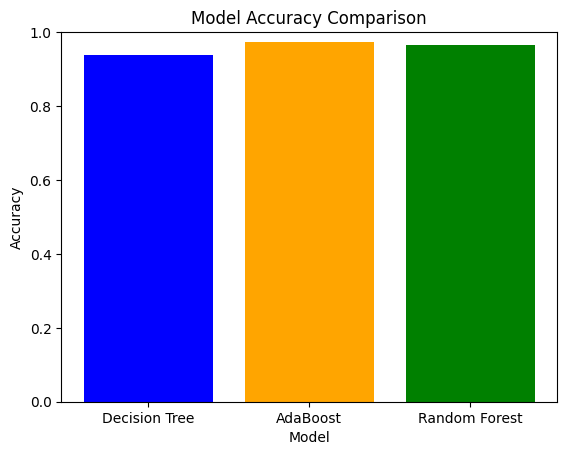

In [ ]:
models = ['Decision Tree', 'AdaBoost', 'Random Forest']

accuracies = [accuracy_DT, accuracy_ada, accuracy_rf]

plt.bar(models, accuracies, color=['blue', 'orange', 'green'])
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')
plt.ylim(0, 1)
plt.show()

In [ ]:
X = data.data

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, data.target, test_size=0.2, random_state=42)

In [ ]:
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
y_pred_DT = model.predict(X_test)

accuracy_DT = accuracy_score(y_test, y_pred_DT)
print(f"Accuracy:, {accuracy_DT:.2f}")

Accuracy:, 0.93


In [ ]:
adaboost = AdaBoostClassifier(n_estimators=100, random_state=42)
adaboost.fit(X_train, y_train)

AdaBoostClassifier(n_estimators=100, random_state=42)

In [ ]:
y_pred_ada = adaboost.predict(X_test)

In [ ]:
accuracy_ada = accuracy_score(y_test, y_pred_ada)
print(f"Accuracy:, {accuracy_ada:.2f}")

Accuracy:, 0.97


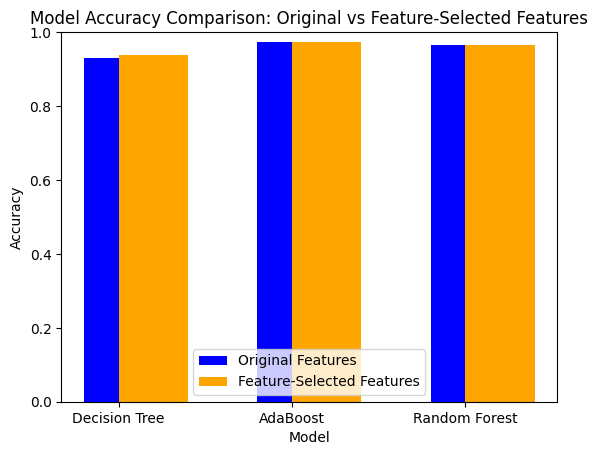

In [ ]:
models = ['Decision Tree', 'AdaBoost', 'Random Forest']

# Accuracy values for original features (X)
accuracies_X = [accuracy_DT, accuracy_ada, accuracy_rf]

# Accuracy values for feature-selected features (X_ft)
accuracies_X_ft = [accuracy_DT_ft, accuracy_ada_ft, accuracy_rf_ft]

# Plot comparison
x = range(len(models))

plt.bar(x, accuracies_X, width=0.4, label='Original Features', color='blue', align='center')
plt.bar(x, accuracies_X_ft, width=0.4, label='Feature-Selected Features', color='orange', align='edge')

plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison: Original vs Feature-Selected Features')
plt.xticks(x, models)
plt.ylim(0, 1)  # Accuracy is between 0 and 1
plt.legend()

plt.show()

Random Forest Accuracy: 96.49%
Decision Tree Accuracy: 92.98%
AdaBoost Accuracy: 97.37%
AdaBoost ft Accuracy: 0.97%
Random Forest ft Accuracy: 96.49%
Decision Tree ft Accuracy: 0.94%


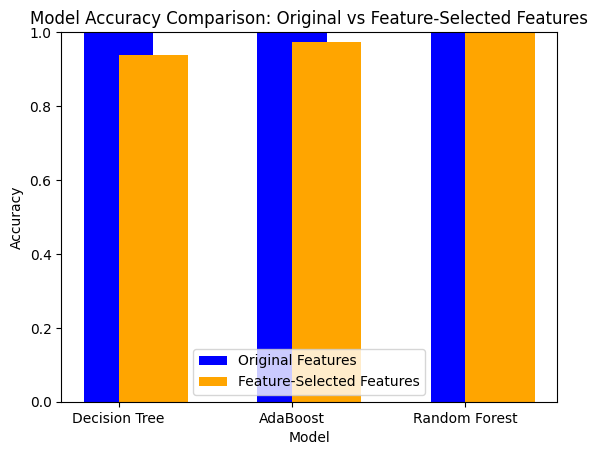

In [ ]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf) * 100
print(f"Random Forest Accuracy: {accuracy_rf:.2f}%")

# Train and calculate accuracy for Decision Tree and AdaBoost (with original features)
accuracy_DT = accuracy_score(y_test, y_pred_DT) * 100
print(f"Decision Tree Accuracy: {accuracy_DT:.2f}%")

accuracy_ada = accuracy_score(y_test, y_pred_ada) * 100
print(f"AdaBoost Accuracy: {accuracy_ada:.2f}%")

print(f"AdaBoost ft Accuracy: {accuracy_ada_ft:.2f}%")
print(f"Random Forest ft Accuracy: {accuracy_rf_ft:.2f}%")
print(f"Decision Tree ft Accuracy: {accuracy_DT_ft:.2f}%")

# Accuracy values for original features (X)
accuracies_X = [accuracy_DT, accuracy_ada, accuracy_rf]

# Accuracy values for feature-selected features (X_ft)
accuracies_X_ft = [accuracy_DT_ft, accuracy_ada_ft, accuracy_rf_ft]

# Plot comparison
x = range(len(models))

plt.bar(x, accuracies_X, width=0.4, label='Original Features', color='blue', align='center')
plt.bar(x, accuracies_X_ft, width=0.4, label='Feature-Selected Features', color='orange', align='edge')

plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison: Original vs Feature-Selected Features')
plt.xticks(x, models)
plt.ylim(0, 1)  # Accuracy is between 0 and 1
plt.legend()

plt.show()

Random Forest Accuracy (Full Features): 96.49%
Random Forest Accuracy (Feature-Selected): 94.74%
AdaBoost Accuracy (Feature-Selected): 95.61%
Decision Tree Accuracy (Feature-Selected): 94.74%


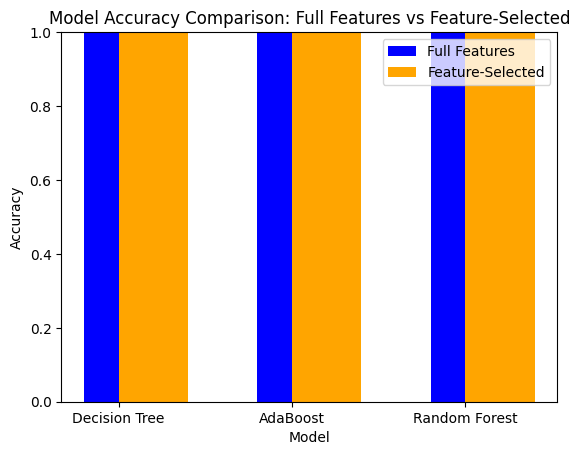

In [ ]:
data = load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names)

# Extract features and target
X = data.data
y = data.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# --- Random Forest on Full Feature Set ---
rf_model_full = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model_full.fit(X_train, y_train)

# Predict and calculate accuracy
y_pred_rf_full = rf_model_full.predict(X_test)
accuracy_rf_full = accuracy_score(y_test, y_pred_rf_full) * 100
print(f"Random Forest Accuracy (Full Features): {accuracy_rf_full:.2f}%")

# --- Feature Selection ---
X_ft = df[['worst area', 'worst concave points', 'mean concave points', 'worst radius', 'mean concavity']]

# Split the feature-selected data
X_ft_train, X_ft_test, y_train, y_test = train_test_split(X_ft, y, test_size=0.2, random_state=42)

# --- Random Forest on Feature-Selected Set ---
rf_model_ft = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model_ft.fit(X_ft_train, y_train)

# Predict and calculate accuracy for feature-selected data
y_pred_rf_ft = rf_model_ft.predict(X_ft_test)
accuracy_rf_ft = accuracy_score(y_test, y_pred_rf_ft) * 100
print(f"Random Forest Accuracy (Feature-Selected): {accuracy_rf_ft:.2f}%")

# --- AdaBoost Classifier ---
adaboost = AdaBoostClassifier(n_estimators=100, random_state=42)
adaboost.fit(X_ft_train, y_train)

y_pred_ada = adaboost.predict(X_ft_test)
accuracy_ada_ft = accuracy_score(y_test, y_pred_ada) * 100
print(f"AdaBoost Accuracy (Feature-Selected): {accuracy_ada_ft:.2f}%")

# --- Decision Tree Classifier ---
model_dt = DecisionTreeClassifier()
model_dt.fit(X_ft_train, y_train)

y_pred_dt = model_dt.predict(X_ft_test)
accuracy_dt_ft = accuracy_score(y_test, y_pred_dt) * 100
print(f"Decision Tree Accuracy (Feature-Selected): {accuracy_dt_ft:.2f}%")

# --- Model Comparison Visualization ---
models = ['Decision Tree', 'AdaBoost', 'Random Forest']

# Accuracy values for original features (Full Set)
accuracies_full = [accuracy_dt_ft, accuracy_ada_ft, accuracy_rf_full]

# Accuracy values for feature-selected features (X_ft)
accuracies_ft = [accuracy_dt_ft, accuracy_ada_ft, accuracy_rf_ft]

x = range(len(models))

plt.bar(x, accuracies_full, width=0.4, label='Full Features', color='blue', align='center')
plt.bar(x, accuracies_ft, width=0.4, label='Feature-Selected', color='orange', align='edge')

plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison: Full Features vs Feature-Selected')
plt.xticks(x, models)
plt.ylim(0, 1)  # Accuracy is between 0 and 1
plt.legend()

plt.show()

Random Forest Accuracy (Full Features): 96.49%
AdaBoost Accuracy (Full Features): 97.37%
Decision Tree Accuracy (Full Features): 94.74%
Random Forest Accuracy (Feature-Selected): 94.74%
AdaBoost Accuracy (Feature-Selected): 95.61%
Decision Tree Accuracy (Feature-Selected): 93.86%


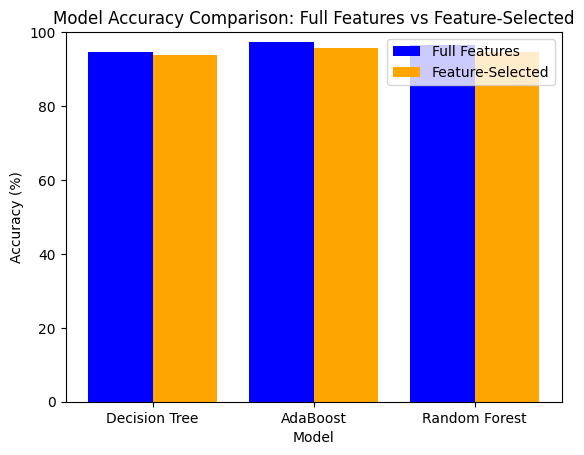

In [ ]:
data = load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names)

# Extract features and target
X = data.data
y = data.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# --- Random Forest on Full Feature Set ---
rf_model_full = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model_full.fit(X_train, y_train)

# Predict and calculate accuracy
y_pred_rf_full = rf_model_full.predict(X_test)
accuracy_rf_full = accuracy_score(y_test, y_pred_rf_full) * 100
print(f"Random Forest Accuracy (Full Features): {accuracy_rf_full:.2f}%")

# --- AdaBoost Classifier on Full Feature Set ---
adaboost_full = AdaBoostClassifier(n_estimators=100, random_state=42)
adaboost_full.fit(X_train, y_train)

y_pred_ada_full = adaboost_full.predict(X_test)
accuracy_ada_full = accuracy_score(y_test, y_pred_ada_full) * 100
print(f"AdaBoost Accuracy (Full Features): {accuracy_ada_full:.2f}%")

# --- Decision Tree on Full Feature Set ---
dt_model_full = DecisionTreeClassifier(random_state=42)
dt_model_full.fit(X_train, y_train)

y_pred_dt_full = dt_model_full.predict(X_test)
accuracy_dt_full = accuracy_score(y_test, y_pred_dt_full) * 100
print(f"Decision Tree Accuracy (Full Features): {accuracy_dt_full:.2f}%")

# --- Feature Selection ---
X_ft = df[['worst area', 'worst concave points', 'mean concave points', 'worst radius', 'mean concavity']]

# Split the feature-selected data
X_ft_train, X_ft_test, y_train, y_test = train_test_split(X_ft, y, test_size=0.2, random_state=42)

# --- Random Forest on Feature-Selected Set ---
rf_model_ft = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model_ft.fit(X_ft_train, y_train)

# Predict and calculate accuracy for feature-selected data
y_pred_rf_ft = rf_model_ft.predict(X_ft_test)
accuracy_rf_ft = accuracy_score(y_test, y_pred_rf_ft) * 100
print(f"Random Forest Accuracy (Feature-Selected): {accuracy_rf_ft:.2f}%")

# --- AdaBoost Classifier on Feature-Selected Set ---
adaboost_ft = AdaBoostClassifier(n_estimators=100, random_state=42)
adaboost_ft.fit(X_ft_train, y_train)

y_pred_ada_ft = adaboost_ft.predict(X_ft_test)
accuracy_ada_ft = accuracy_score(y_test, y_pred_ada_ft) * 100
print(f"AdaBoost Accuracy (Feature-Selected): {accuracy_ada_ft:.2f}%")

# --- Decision Tree on Feature-Selected Set ---
dt_model_ft = DecisionTreeClassifier(random_state=42)
dt_model_ft.fit(X_ft_train, y_train)

y_pred_dt_ft = dt_model_ft.predict(X_ft_test)
accuracy_dt_ft = accuracy_score(y_test, y_pred_dt_ft) * 100
print(f"Decision Tree Accuracy (Feature-Selected): {accuracy_dt_ft:.2f}%")

# --- Model Comparison Visualization ---
models = ['Decision Tree', 'AdaBoost', 'Random Forest']

# Accuracy values for full features
accuracies_full = [accuracy_dt_full, accuracy_ada_full, accuracy_rf_full]

# Accuracy values for feature-selected features
accuracies_ft = [accuracy_dt_ft, accuracy_ada_ft, accuracy_rf_ft]

x = np.arange(len(models))

# Create the plot for comparison
plt.bar(x - 0.2, accuracies_full, width=0.4, label='Full Features', color='blue', align='center')
plt.bar(x + 0.2, accuracies_ft, width=0.4, label='Feature-Selected', color='orange', align='center')

# Labels and Title
plt.xlabel('Model')
plt.ylabel('Accuracy (%)')
plt.title('Model Accuracy Comparison: Full Features vs Feature-Selected')

# Set X-axis with model names
plt.xticks(x, models)

# Set Y-axis limits to 0-100 for better clarity in percentages
plt.ylim(0, 100)

# Show the legend
plt.legend()

# Display the plot
plt.show()